# Import packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime

In [ ]:
df=pd.read_csv("/content/train-chennai-sale.csv")# read the file
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [ ]:
df.shape

(7109, 22)

# Find The Null Values

In [ ]:
df.isnull().sum()


PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

# Fill The NULL Values

In [ ]:
df.N_BEDROOM.values

array([1., 2., 1., ..., 2., 1., 3.])

In [ ]:
df.N_BATHROOM.values

array([1., 1., 1., ..., 1., 1., 2.])

In [ ]:
df.QS_OVERALL.values

array([4.33 , 3.765, 3.09 , ..., 3.84 , 4.16 , 3.64 ])

In [ ]:
df['N_BEDROOM'].fillna(df['N_BEDROOM'].mode()[0],inplace = True)
df['N_BATHROOM'].fillna(df['N_BATHROOM'].mean(),inplace = True)
df['QS_OVERALL'].fillna(df['QS_OVERALL'].mean(),inplace = True)

In [ ]:
df.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7109 non-null   float64
 6   N_BATHROOM     7109 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [ ]:
df.columns.values

array(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD',
       'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL',
       'DATE_BUILD', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE',
       'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE',
       'COMMIS', 'SALES_PRICE'], dtype=object)

# Conversion

In [ ]:
df.N_BEDROOM = df.N_BEDROOM.astype('int64')
df.N_BATHROOM = df.N_BATHROOM.astype('int64')
df['DATE_SALE'] = pd.to_datetime(df['DATE_SALE'])
df['DATE_BUILD'] = pd.to_datetime(df['DATE_BUILD'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   PRT_ID         7109 non-null   object        
 1   AREA           7109 non-null   object        
 2   INT_SQFT       7109 non-null   int64         
 3   DATE_SALE      7109 non-null   datetime64[ns]
 4   DIST_MAINROAD  7109 non-null   int64         
 5   N_BEDROOM      7109 non-null   int64         
 6   N_BATHROOM     7109 non-null   int64         
 7   N_ROOM         7109 non-null   int64         
 8   SALE_COND      7109 non-null   object        
 9   PARK_FACIL     7109 non-null   object        
 10  DATE_BUILD     7109 non-null   datetime64[ns]
 11  BUILDTYPE      7109 non-null   object        
 12  UTILITY_AVAIL  7109 non-null   object        
 13  STREET         7109 non-null   object        
 14  MZZONE         7109 non-null   object        
 15  QS_ROOMS       7109 n

# Find The Duplicate values

In [ ]:
duplicate = df.duplicated(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD',
       'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL',
       'DATE_BUILD', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE',
       'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE',
       'COMMIS', 'SALES_PRICE'])
duplicate

0       False
1       False
2       False
3       False
4       False
        ...  
7104    False
7105    False
7106    False
7107    False
7108    False
Length: 7109, dtype: bool

# Detect The Outlier

In [ ]:
df.head(2)

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,2011-04-05,131,1,1,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770


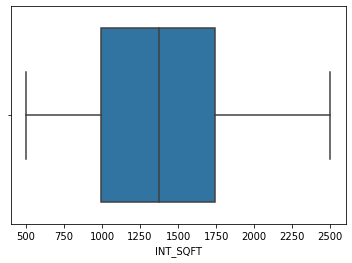

In [ ]:
sns.boxplot(x = 'INT_SQFT',data = df)

In [ ]:
sum(((df.DIST_MAINROAD - df.DIST_MAINROAD.mean())/df.DIST_MAINROAD.std()) >3 )

0

In [ ]:
sum(((df.N_BEDROOM  - df.N_BEDROOM .mean())/df.N_BEDROOM .std()) >3 )

0

In [ ]:
sum(((df. N_BATHROOM - df. N_BATHROOM .mean())/df. N_BATHROOM .std()) >3 )

0

In [ ]:
sum(((df. N_ROOM  - df. N_ROOM .mean())/df.N_ROOM  .std()) >3 )

0

In [ ]:
sum(((df. SALES_PRICE   - df. SALES_PRICE .mean())/df.SALES_PRICE  .std()) >3 )

37

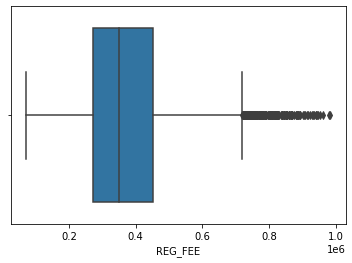

In [ ]:
sns.boxplot(x = 'REG_FEE',data = df)

In [ ]:
sum(((df.  REG_FEE   - df. REG_FEE .mean())/df. REG_FEE   .std()) >3 )

91

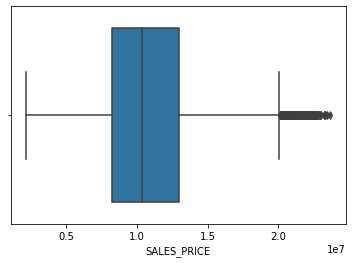

In [ ]:
sns.boxplot(x = 'SALES_PRICE',data = df)

In [ ]:
sum(((df.  COMMIS   - df. COMMIS  .mean())/df.COMMIS   .std()) >3 )

73

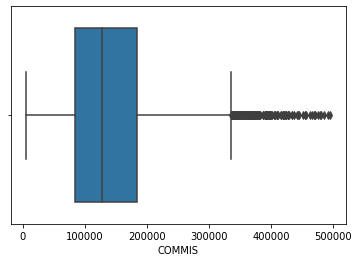

In [ ]:
sns.boxplot(x = 'COMMIS',data = df)

In [ ]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,2011-04-05,131,1,1,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,2012-04-02,70,1,1,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,2010-03-13,14,3,2,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,2009-05-10,84,1,1,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


# **FIND AND DETECT SPELLING MISTAKES**

In [ ]:
df["AREA"] = df["AREA"].replace({"Karapakam":"Karapakkam","Ann Nagar":"Anna Nagar","Ana Nagar":"Anna Nagar","Adyr":"Adyar","Velchery":"Velachery",
                                     "Chrompt":"Chrompet","Chrmpet":"Chrompet", "Chormpet":"Chrompet","KKNagar":"KK Nagar","TNagar":"T Nagar"})

In [ ]:
df.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [ ]:
df["SALE_COND"] = df["SALE_COND"].replace({'Ab Normal' : 'AbNormal','ParatiaLl': 'Partial','Partiall':'Partial','PartiaLl':'Partial','Adj Land':  'AdjLand'})
df.SALE_COND.unique()                                                                                                                 

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale'],
      dtype=object)

In [ ]:
df.PARK_FACIL = df.PARK_FACIL.replace({"Noo" : "No"})
df.PARK_FACIL.unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df.BUILDTYPE = df.BUILDTYPE.replace({"Other":"Others","Comercial":"Commercial"})
df.BUILDTYPE.unique() 

array(['Commercial', 'Others', 'House'], dtype=object)

In [ ]:
df.UTILITY_AVAIL = df.UTILITY_AVAIL.replace({"All Pub":"AllPub",'NoSewr ':'NoSeWa'})
df.UTILITY_AVAIL.unique()

array(['AllPub', 'ELO', 'NoSeWa'], dtype=object)

In [ ]:
df.STREET.values

array(['Paved', 'Gravel', 'Gravel', ..., 'Gravel', 'Paved', 'Paved'],
      dtype=object)

In [ ]:
df.STREET = df.STREET.replace({"NoAccess" : "No Access",'Pavd':'Paved'})
df.STREET.unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

# Find The Age Of Building

In [ ]:
df['House_age']=df['DATE_SALE'].dt.year-df['DATE_BUILD'].dt.year
df['House_age']

0       44
1       11
2       20
3       22
4       30
        ..
7104    49
7105     9
7106    28
7107    32
7108    44
Name: House_age, Length: 7109, dtype: int64

**Total price** of the house
 This is consider as a target value

In [ ]:
df['Target_Total_Price'] = df['REG_FEE']+df['COMMIS']+df['SALES_PRICE']
df['Target_Total_Price']

0        8124400
1       22781941
2       13672408
3       10063653
4        7717313
          ...   
7104     5668827
7105    11370222
7106     8835792
7107     9051448
7108    10405469
Name: Target_Total_Price, Length: 7109, dtype: int64

# **ENCODING THE DATA**

In [ ]:
area = {'Karapakkam':0, 'Adyar':1, 'Chrompet':2, 'Velachery':3, 'KK Nagar':4,'Anna Nagar':5, 'T Nagar':6}
df['AREA'] = df.AREA.map(area)
df['AREA']

0       0
1       5
2       1
3       3
4       0
       ..
7104    0
7105    3
7106    3
7107    0
7108    3
Name: AREA, Length: 7109, dtype: int64

In [ ]:
sale_cond = {'AbNormal':0, 'Family':1, 'Partial':2, 'AdjLand':3, 'Normal Sale':4}
df['SALE_COND'] = df.SALE_COND.map(sale_cond)
df['SALE_COND']

0       0
1       0
2       0
3       1
4       0
       ..
7104    3
7105    1
7106    4
7107    2
7108    2
Name: SALE_COND, Length: 7109, dtype: int64

In [ ]:
utility_avail = {'AllPub':0, 'ELO':1, 'NoSeWa':2}
df['UTILITY_AVAIL'] = df.UTILITY_AVAIL.map(utility_avail)
df['UTILITY_AVAIL']

0       0
1       0
2       1
3       2
4       0
       ..
7104    1
7105    2
7106    2
7107    1
7108    1
Name: UTILITY_AVAIL, Length: 7109, dtype: int64

In [ ]:
street = {'Paved':0, 'Gravel':1, 'No Access':2}
df['STREET'] = df.STREET.map(street)
df['STREET']

0       0
1       1
2       1
3       0
4       1
       ..
7104    2
7105    2
7106    1
7107    0
7108    0
Name: STREET, Length: 7109, dtype: int64

In [ ]:
mzzone = {'A':0,'C':1,'I':2,'RH':3,'RL':4,'RM':5}
df['MZZONE'] = df.MZZONE.map(mzzone)
df['MZZONE']

0       0
1       3
2       4
3       2
4       1
       ..
7104    5
7105    3
7106    2
7107    4
7108    2
Name: MZZONE, Length: 7109, dtype: int64

In [ ]:
buildtype = {'Commercial':0, 'Others':1, 'House':2}
df['BUILDTYPE'] = df.BUILDTYPE.map(buildtype)
df['BUILDTYPE']

0       0
1       0
2       0
3       1
4       1
       ..
7104    1
7105    1
7106    2
7107    0
7108    1
Name: BUILDTYPE, Length: 7109, dtype: int64

In [ ]:
park_facil = {'Yes':0,'No':1}
df['PARK_FACIL'] = df.PARK_FACIL.map(park_facil)
df['PARK_FACIL']

0       0
1       1
2       0
3       1
4       0
       ..
7104    1
7105    0
7106    1
7107    0
7108    0
Name: PARK_FACIL, Length: 7109, dtype: int64

In [ ]:
df.isnull().sum()

PRT_ID                0
AREA                  0
INT_SQFT              0
DATE_SALE             0
DIST_MAINROAD         0
N_BEDROOM             0
N_BATHROOM            0
N_ROOM                0
SALE_COND             0
PARK_FACIL            0
DATE_BUILD            0
BUILDTYPE             0
UTILITY_AVAIL         0
STREET                0
MZZONE                0
QS_ROOMS              0
QS_BATHROOM           0
QS_BEDROOM            0
QS_OVERALL            0
REG_FEE               0
COMMIS                0
SALES_PRICE           0
House_age             0
Target_Total_Price    0
dtype: int64

In [ ]:
df.AREA.unique()

array([0, 5, 1, 3, 2, 4, 6])

In [ ]:
### Encoded columns

# 1) AREA --> {'Karapakkam':0, 'Anna Nagar':1, 'Adayar':2, 'Velachery':3, 'Chrompet':4,'KK Nagar':5, 'T Nagar':6}
# 2) SALE_COND --> {'AbNormal':0, 'Family':1, 'Partial':2, 'AdjLand':3, 'Normal Sale':4}
# 3) UTILITY_AVAIL --> {'AllPub':0, 'ELO':1, 'NoSeWa':2}
# 4) STREET --> {'Paved':0, 'Gravel':1, 'NoAccess':2}
# 5) MZZONE --> {'A':0,'C':1,'I':2,'RH':3,'RL':4,'RM':5}
# 6) BUILDTYPE --> {'Commercial':0, 'Others':1, 'House':2}
# 7) PARK_FACIL --> {'Yes':0,'No':1}

In [ ]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,House_age,Target_Total_Price
0,P03210,0,1004,2011-04-05,131,1,1,3,0,0,...,0,4.0,3.9,4.9,4.330,380000,144400,7600000,44,8124400
1,P09411,5,1986,2006-12-19,26,2,1,5,0,1,...,3,4.9,4.2,2.5,3.765,760122,304049,21717770,11,22781941
2,P01812,1,909,2012-04-02,70,1,1,3,0,0,...,4,4.1,3.8,2.2,3.090,421094,92114,13159200,20,13672408
3,P05346,3,1855,2010-03-13,14,3,2,5,1,1,...,2,4.7,3.9,3.6,4.010,356321,77042,9630290,22,10063653
4,P06210,0,1226,2009-05-10,84,1,1,3,0,0,...,1,3.0,2.5,4.1,3.290,237000,74063,7406250,30,7717313


# **Drop the Unwanted Columns**

In [ ]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE', 'House_age', 'Target_Total_Price'],
      dtype='object')

In [ ]:
df= df.drop(columns=['PRT_ID','DATE_SALE','DATE_BUILD','QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL','REG_FEE','COMMIS',
                       'SALES_PRICE'])

In [ ]:
df

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,House_age,Target_Total_Price
0,0,1004,131,1,1,3,0,0,0,0,0,0,44,8124400
1,5,1986,26,2,1,5,0,1,0,0,1,3,11,22781941
2,1,909,70,1,1,3,0,0,0,1,1,4,20,13672408
3,3,1855,14,3,2,5,1,1,1,2,0,2,22,10063653
4,0,1226,84,1,1,3,0,0,1,0,1,1,30,7717313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,0,598,51,1,1,2,3,1,1,1,2,5,49,5668827
7105,3,1897,52,3,2,5,1,0,1,2,2,3,9,11370222
7106,3,1614,152,2,1,4,4,1,2,2,1,2,28,8835792
7107,0,787,40,1,1,2,2,0,0,1,0,4,32,9051448


In [ ]:
df.to_csv('chennai_sale_cleaned.csv_file',index=False)
df

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,House_age,Target_Total_Price
0,0,1004,131,1,1,3,0,0,0,0,0,0,44,8124400
1,5,1986,26,2,1,5,0,1,0,0,1,3,11,22781941
2,1,909,70,1,1,3,0,0,0,1,1,4,20,13672408
3,3,1855,14,3,2,5,1,1,1,2,0,2,22,10063653
4,0,1226,84,1,1,3,0,0,1,0,1,1,30,7717313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,0,598,51,1,1,2,3,1,1,1,2,5,49,5668827
7105,3,1897,52,3,2,5,1,0,1,2,2,3,9,11370222
7106,3,1614,152,2,1,4,4,1,2,2,1,2,28,8835792
7107,0,787,40,1,1,2,2,0,0,1,0,4,32,9051448


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   AREA                7109 non-null   int64
 1   INT_SQFT            7109 non-null   int64
 2   DIST_MAINROAD       7109 non-null   int64
 3   N_BEDROOM           7109 non-null   int64
 4   N_BATHROOM          7109 non-null   int64
 5   N_ROOM              7109 non-null   int64
 6   SALE_COND           7109 non-null   int64
 7   PARK_FACIL          7109 non-null   int64
 8   BUILDTYPE           7109 non-null   int64
 9   UTILITY_AVAIL       7109 non-null   int64
 10  STREET              7109 non-null   int64
 11  MZZONE              7109 non-null   int64
 12  House_age           7109 non-null   int64
 13  Target_Total_Price  7109 non-null   int64
dtypes: int64(14)
memory usage: 777.7 KB


# **Exploratory Data Analysis**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AREA,7109.0,2.539738e+00,1.846837e+00,0.0,1.0,2.0,4.0,6.0
INT_SQFT,7109.0,1.382073e+03,4.574109e+02,500.0,993.0,1373.0,1744.0,2500.0
DIST_MAINROAD,7109.0,9.960318e+01,5.740311e+01,0.0,50.0,99.0,148.0,200.0
N_BEDROOM,7109.0,1.636939e+00,8.028806e-01,1.0,1.0,1.0,2.0,4.0
N_BATHROOM,7109.0,1.213110e+00,4.095336e-01,1.0,1.0,1.0,1.0,2.0
N_ROOM,7109.0,3.688704e+00,1.019099e+00,2.0,3.0,4.0,4.0,6.0
SALE_COND,7109.0,2.008440e+00,1.412297e+00,0.0,1.0,2.0,3.0,4.0
PARK_FACIL,7109.0,4.954283e-01,5.000143e-01,0.0,0.0,0.0,1.0,1.0
BUILDTYPE,7109.0,1.016177e+00,8.192894e-01,0.0,0.0,1.0,2.0,2.0
UTILITY_AVAIL,7109.0,1.255029e+00,8.490977e-01,0.0,0.0,2.0,2.0,2.0


In [ ]:
df[['INT_SQFT','DIST_MAINROAD','House_age','Target_Total_Price']].describe().T

,count,mean,std,min,25%,50%,75%,max
INT_SQFT,7109.0,1.382073e+03,4.574109e+02,500.0,993.0,1373.0,1744.0,2500.0
DIST_MAINROAD,7109.0,9.960318e+01,5.740311e+01,0.0,50.0,99.0,148.0,200.0
House_age,7109.0,2.427627e+01,1.233416e+01,3.0,14.0,23.0,34.0,55.0
Target_Total_Price,7109.0,1.141285e+07,3.944957e+06,2253935.0,8645792.0,10819531.0,13613927.0,24969043.0


In [ ]:
#temp_dict = {'AREA':['Karapakkam', 'Anna Nagar', 'Adayar', 'Velachery', 'Chrompet','KK Nagar', 'T Nagar'],
#'SALE_COND':['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale'],
#'UTILITY_AVAIL':['AllPub', 'ELO', 'NoSeWa'],
#'STREET':['Paved', 'Gravel', 'NoAccess'],
#'MZZONE':['A','C','I','RH','RL','RM'],
#'BUILDTYPE':['Commercial', 'Others', 'House'],
#'PARK_FACIL':['Yes','No']}
#temp_key = list(temp_dict)
#temp_value = list(temp_dict.values())

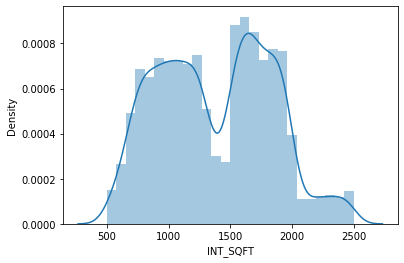

In [ ]:
sns.distplot(df.INT_SQFT)
#dist,histogram

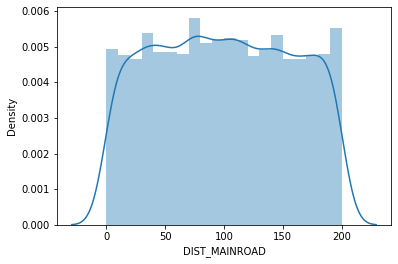

In [ ]:
sns.distplot(df.DIST_MAINROAD)

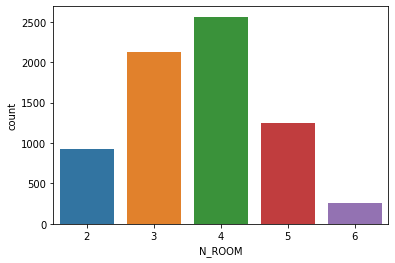

In [ ]:
sns.countplot(df['N_ROOM'])
#discret variable bargraph

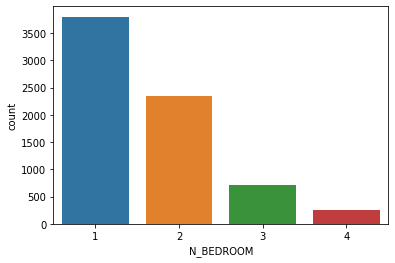

In [ ]:
sns.countplot(df['N_BEDROOM'])
#discret variable bargraph

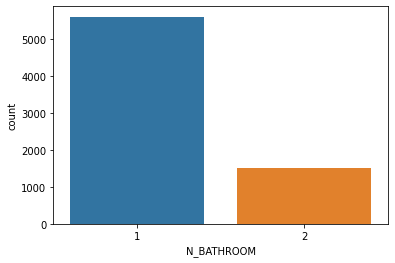

In [ ]:
sns.countplot(df['N_BATHROOM'])
#discret variable bargraph

In [ ]:
value = df['SALE_COND'].value_counts()
name = df['SALE_COND'].unique()

fig1 = px.pie(df,values = value, names=name, color = value,title="SALE_COND")
fig1

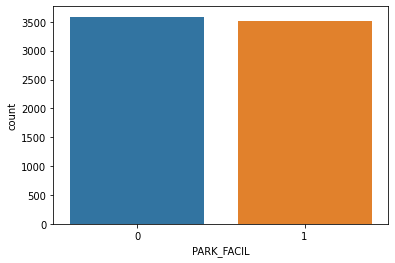

In [ ]:
sns.countplot(df['PARK_FACIL'])

In [ ]:
df

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,House_age,Target_Total_Price
0,0,1004,131,1,1,3,0,0,0,0,0,0,44,8124400
1,5,1986,26,2,1,5,0,1,0,0,1,3,11,22781941
2,1,909,70,1,1,3,0,0,0,1,1,4,20,13672408
3,3,1855,14,3,2,5,1,1,1,2,0,2,22,10063653
4,0,1226,84,1,1,3,0,0,1,0,1,1,30,7717313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,0,598,51,1,1,2,3,1,1,1,2,5,49,5668827
7105,3,1897,52,3,2,5,1,0,1,2,2,3,9,11370222
7106,3,1614,152,2,1,4,4,1,2,2,1,2,28,8835792
7107,0,787,40,1,1,2,2,0,0,1,0,4,32,9051448


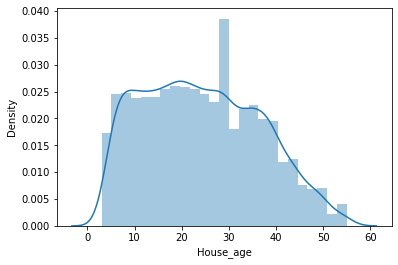

In [ ]:
sns.distplot(df.House_age)

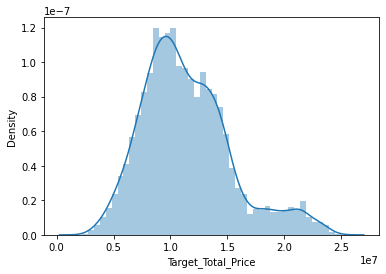

In [ ]:
sns.distplot(df.Target_Total_Price)

# **EDA for Feature vs Target**

In [ ]:
x = pd.DataFrame(df.groupby('AREA')["Target_Total_Price"].mean())
y = df['AREA'].unique()
y = sorted(y)
df2 = {'AREA':y,"AVERAGE_PRICE":x['Target_Total_Price']}
temp = pd.DataFrame(df2)
temp.sort_values('AVERAGE_PRICE',inplace = True)

fig1 = px.bar(temp,x = 'AREA',y = 'AVERAGE_PRICE', color = 'AREA', title = "AREA VS AVERAGE_PRICE")
fig1

In [ ]:
fig1 = px.scatter(df,x = 'INT_SQFT', y = 'Target_Total_Price', color = 'INT_SQFT' ,title="INT_SQFT VS Target_Total_Price")
fig1

From Plot INT_SQFT VS Target_Total_Price Interpreted that if Square feet's of House Increase than there will be increase in Price of the House. in this plot we can see linearity Clearly.

In [ ]:
fig2 = px.bar(df,x = 'DIST_MAINROAD', y = 'Target_Total_Price', color = 'DIST_MAINROAD',title="DIST_MAINROAD VS Target_Total_Price")
fig2

From Plot DIST_MAINROAD VS Target_Total_Price Interpreted that there is no Relationship for DIST_MAIND and Total_Sales_price. in General if Distance from Main Road is less House price will be Higher but in this dataset Distance from mainroad is not showing any impact on Price.

> Indented block



In [ ]:
x = pd.DataFrame(df.groupby('N_ROOM')["Target_Total_Price"].mean())
y = df['N_ROOM'].unique()
y = sorted(y)
df2 = {'N_ROOM':y,"AVERAGE_PRICE":x['Target_Total_Price']}
temp = pd.DataFrame(df2)
temp.sort_values('AVERAGE_PRICE',inplace = True)

fig1 = px.bar(temp,x = 'N_ROOM',y = 'AVERAGE_PRICE', color = 'N_ROOM', title = "N_ROOM VS AVERAGE_PRICE")
fig1


From N_ROOM Vs Average_Price interpreted that if No of Rooms Increases Price of the House will also increase. above plot is showing that House with 6 Rooms has Higher price and price is Linearly Decreasing if no of rooms Decreases

In [ ]:
x = pd.DataFrame(df.groupby('N_BEDROOM')["Target_Total_Price"].mean())
y = df['N_BEDROOM'].unique()
y = sorted(y)
df2 = {'N_BEDROOM':y,"AVERAGE_PRICE":x['Target_Total_Price']}
temp = pd.DataFrame(df2)
temp.sort_values('AVERAGE_PRICE',inplace = True)

fig1 = px.bar(temp,x = 'N_BEDROOM',y = 'AVERAGE_PRICE', color = 'N_BEDROOM', title = "N_BEDROOM VS AVERAGE_PRICE")
fig1

From N_BEDROOM Vs Average_Price interpreted that if the No of Bed Rooms Increases Price of the House will also increase. above plot is showing that House with 4 Bed Rooms has Higher price and price is Linearly Decreasing if no of Bed Rooms Decreases

In [ ]:
x = pd.DataFrame(df.groupby('N_BATHROOM')["Target_Total_Price"].mean())
y = df['N_BATHROOM'].unique()
y = sorted(y)
df2 = {'N_BATHROOM':y,"AVERAGE_PRICE":x['Target_Total_Price']}
temp = pd.DataFrame(df2)
temp.sort_values('AVERAGE_PRICE',inplace = True)

fig1 = px.bar(temp,x = 'N_BATHROOM',y = 'AVERAGE_PRICE', color = 'N_BATHROOM', title = "N_BATHROOM VS AVERAGE_PRICE")
fig1

From Plot N_BATHROOM Vs Average_Price interpreted that The House With 2 Bath Rooms has Higher Price than The House With 1 Bath Room. So The Price Will Be Higher for House with 2 Bath Rooms

In [ ]:
x = pd.DataFrame(df.groupby('SALE_COND')["Target_Total_Price"].mean())
y = df['SALE_COND'].unique()
y = sorted(y)
df2 = {'SALE_COND':y,"AVERAGE_PRICE":x['Target_Total_Price']}
temp = pd.DataFrame(df2)
temp.sort_values('AVERAGE_PRICE',inplace = True)

fig1 = px.bar(temp,x = 'SALE_COND',y = 'AVERAGE_PRICE', color = 'SALE_COND', title = "SALE_COND VS AVERAGE_PRICE")
fig1

From The Plot SALE_COND VS AVERAGE_PRICE We Interpreted That Houses with different Sale Condition are not Varying Too Much. Prices are varying a little amount. here we got AdjLand has some good value than others

In [ ]:
x = pd.DataFrame(df.groupby('BUILDTYPE')["Target_Total_Price"].mean())
y = df['BUILDTYPE'].unique()
y = sorted(y)
df2 = {'BUILDTYPE':y,"AVERAGE_PRICE":x['Target_Total_Price']}
temp = pd.DataFrame(df2)
temp.sort_values('AVERAGE_PRICE',inplace = True)

fig1 = px.bar(temp,x = 'BUILDTYPE',y = 'AVERAGE_PRICE', color = 'BUILDTYPE', title = "BUILDTYPE VS AVERAGE_PRICE")
fig1

From the Plot BUILDTYPE VS AVERAGE_PRICE Interpreted that the Commerical Houses has Much Higher Prices than the Normal Houses and Non Commercial Purpose Houses. So Price for Commercial Buildings will have Much Higher Prices.

In [ ]:
x = pd.DataFrame(df.groupby('UTILITY_AVAIL')["Target_Total_Price"].mean())
y = df['UTILITY_AVAIL'].unique()
y = sorted(y)
df2 = {'UTILITY_AVAIL':y,"AVERAGE_PRICE":x['Target_Total_Price']}
temp = pd.DataFrame(df2)
temp.sort_values('AVERAGE_PRICE',inplace = True)

fig1 = px.bar(temp,x = 'UTILITY_AVAIL',y = 'AVERAGE_PRICE', color = 'UTILITY_AVAIL', title = "UTILITY_AVAIL VS AVERAGE_PRICE")
fig1

From The Plot UTILITY_AVAIL VS AVERAGE_PRICE Interpreted that Utility availabity is showing less impact on House Price we can see from the plot that there are not much Diffrence in the prices of Houses Based on Utility availabity but All Public Facility Feature has some higher Price

In [ ]:
x = pd.DataFrame(df.groupby('STREET')["Target_Total_Price"].mean())
y = df['STREET'].unique()
y = sorted(y)
df2 = {'STREET':y,"AVERAGE_PRICE":x['Target_Total_Price']}
temp = pd.DataFrame(df2)
temp.sort_values('AVERAGE_PRICE',inplace = True)

fig1 = px.bar(temp,x = 'STREET',y = 'AVERAGE_PRICE', color = 'STREET', title = "STREET VS AVERAGE_PRICE")
fig1

From The Plot STREET VS AVERAGE_PRICE Interpreted that Street with Gravel and Paved roads have some Higher Prices than the No Access. for Gravel road and Paved roads there is not much Difference in the Price

In [ ]:
x = pd.DataFrame(df.groupby('MZZONE')["Target_Total_Price"].mean())
y = df['MZZONE'].unique()
y = sorted(y)
df2 = {'MZZONE':y,"AVERAGE_PRICE":x['Target_Total_Price']}
temp = pd.DataFrame(df2)
temp.sort_values('AVERAGE_PRICE',inplace = True)

fig1 = px.bar(temp,x = 'MZZONE',y = 'AVERAGE_PRICE', color = 'MZZONE', title = "MZZONE VS AVERAGE_PRICE")
fig1

From The Plot MZZONE VS AVERAGE_PRICE intrepreted the price of the Houses Zone Wise. we sorted the prices of the House According to Zone. Zone RM have Higher House Price and others zones are linearly decreasing in price.

In [ ]:
df.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,House_age,Target_Total_Price
0,0,1004,131,1,1,3,0,0,0,0,0,0,44,8124400
1,5,1986,26,2,1,5,0,1,0,0,1,3,11,22781941
2,1,909,70,1,1,3,0,0,0,1,1,4,20,13672408
3,3,1855,14,3,2,5,1,1,1,2,0,2,22,10063653
4,0,1226,84,1,1,3,0,0,1,0,1,1,30,7717313


In [ ]:
x = pd.DataFrame(df.groupby('House_age')["Target_Total_Price"].mean())
y = df['House_age'].unique()
y = sorted(y)
df2 = {'House_age':y,"AVERAGE_PRICE":x['Target_Total_Price']}
temp = pd.DataFrame(df2)
temp.sort_values('AVERAGE_PRICE',inplace = True)

fig1 = px.bar(temp,x = 'House_age',y = 'AVERAGE_PRICE', color = 'House_age', title = "House_age VS AVERAGE_PRICE")
fig1

From The Plot House_age VS AVERAGE_PRICE Intrepreted that the age is not showing much impact on the price Because here some factors like Commerical Houses, Facilites, Street will have different Prices. so when comes to age of buliding normal house with 5years old will have lesser price than Commercial House with 15 years old.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AREA,7109.0,2.539738e+00,1.846837e+00,0.0,1.0,2.0,4.0,6.0
INT_SQFT,7109.0,1.382073e+03,4.574109e+02,500.0,993.0,1373.0,1744.0,2500.0
DIST_MAINROAD,7109.0,9.960318e+01,5.740311e+01,0.0,50.0,99.0,148.0,200.0
N_BEDROOM,7109.0,1.636939e+00,8.028806e-01,1.0,1.0,1.0,2.0,4.0
N_BATHROOM,7109.0,1.213110e+00,4.095336e-01,1.0,1.0,1.0,1.0,2.0
N_ROOM,7109.0,3.688704e+00,1.019099e+00,2.0,3.0,4.0,4.0,6.0
SALE_COND,7109.0,2.008440e+00,1.412297e+00,0.0,1.0,2.0,3.0,4.0
PARK_FACIL,7109.0,4.954283e-01,5.000143e-01,0.0,0.0,0.0,1.0,1.0
BUILDTYPE,7109.0,1.016177e+00,8.192894e-01,0.0,0.0,1.0,2.0,2.0
UTILITY_AVAIL,7109.0,1.255029e+00,8.490977e-01,0.0,0.0,2.0,2.0,2.0


data.describe() is showing all the stastical infromation like count, mean value,max and min values of all the features and target.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   AREA                7109 non-null   int64
 1   INT_SQFT            7109 non-null   int64
 2   DIST_MAINROAD       7109 non-null   int64
 3   N_BEDROOM           7109 non-null   int64
 4   N_BATHROOM          7109 non-null   int64
 5   N_ROOM              7109 non-null   int64
 6   SALE_COND           7109 non-null   int64
 7   PARK_FACIL          7109 non-null   int64
 8   BUILDTYPE           7109 non-null   int64
 9   UTILITY_AVAIL       7109 non-null   int64
 10  STREET              7109 non-null   int64
 11  MZZONE              7109 non-null   int64
 12  House_age           7109 non-null   int64
 13  Target_Total_Price  7109 non-null   int64
dtypes: int64(14)
memory usage: 777.7 KB


# **Find the correlation** 

**Checking Co-Relation of Feature vs Target**

In [ ]:
col = ['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'House_age']
for i in range(len(col)):
    z = df[[col[i],'Target_Total_Price']].corr()
    fig = px.imshow(z, text_auto=True, aspect="auto")
    fig.show()

In [ ]:
df.corr()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,House_age,Target_Total_Price
AREA,1.000000,0.685243,0.003487,0.320889,-0.044401,0.644971,0.000033,-0.007916,-0.014790,0.005155,-0.074819,0.346385,-0.072180,0.693195
INT_SQFT,0.685243,1.000000,0.002022,0.786263,0.515290,0.951279,0.011033,-0.004618,-0.009084,0.014694,-0.100106,0.143226,-0.012610,0.620010
DIST_MAINROAD,0.003487,0.002022,1.000000,-0.002723,0.001850,0.002301,-0.005010,0.009448,-0.023924,0.003075,-0.013666,0.007334,-0.003559,0.018584
N_BEDROOM,0.320889,0.786263,-0.002723,1.000000,0.755207,0.840209,0.016723,0.009357,0.003155,0.018621,-0.120624,0.049928,-0.045873,0.341300
N_BATHROOM,-0.044401,0.515290,0.001850,0.755207,1.000000,0.568541,0.012457,0.014033,0.014043,0.020080,-0.061310,-0.047164,-0.020403,0.118533
N_ROOM,0.644971,0.951279,0.002301,0.840209,0.568541,1.000000,0.010721,0.000934,-0.008122,0.016157,-0.089727,0.163697,-0.033316,0.609345
SALE_COND,0.000033,0.011033,-0.005010,0.016723,0.012457,0.010721,1.000000,0.009020,0.004867,0.009585,0.000334,0.023724,0.002685,0.023501
PARK_FACIL,-0.007916,-0.004618,0.009448,0.009357,0.014033,0.000934,0.009020,1.000000,0.012029,-0.004047,0.007024,0.007192,0.009010,-0.146908
BUILDTYPE,-0.014790,-0.009084,-0.023924,0.003155,0.014043,-0.008122,0.004867,0.012029,1.000000,0.013079,0.016744,-0.004869,0.011893,-0.516209
UTILITY_AVAIL,0.005155,0.014694,0.003075,0.018621,0.020080,0.016157,0.009585,-0.004047,0.013079,1.000000,-0.027651,0.012343,-0.000200,-0.023239


In [ ]:
z = df.corr()
fig = px.imshow(z, text_auto=True, aspect="auto")
fig.show()

In [ ]:
df.head(2)

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,House_age,Target_Total_Price
0,0,1004,131,1,1,3,0,0,0,0,0,0,44,8124400
1,5,1986,26,2,1,5,0,1,0,0,1,3,11,22781941


# **Split The Data**

In [ ]:
X = df[['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'House_age']].values # features as arrays
y = df['Target_Total_Price'].values # target as arrays
# Syntax : dataset.loc[:, :-1]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 777)

In [ ]:
r2_value = []
cross_vali = []

# **DATA SCALLING**

In [ ]:
from sklearn.preprocessing import StandardScaler # Scaling for linear Regression is not strictly required for better practice we are doing standardscaling
scaler = StandardScaler() #initialise to a variable for standard scaler
scaler.fit(X_train,y_train) #fitting the train datset.we dont fit test dataset as we are going to use the test dataset directly for evalution
X_train_scaled = scaler.transform(X_train) #transform of train data
X_test_scaled = scaler.transform(X_test) #transform of test data

**MODEL**

# **Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
coeff_data = pd.DataFrame(regressor.coef_,['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'House_age'], columns=['Coefficient'])
coeff_data['Coefficient']

AREA             6.139624e+05
INT_SQFT         1.647359e+03
DIST_MAINROAD    2.453570e+02
N_BEDROOM       -1.524127e+06
N_BATHROOM       3.310088e+05
N_ROOM           1.689972e+06
SALE_COND        5.603672e+04
PARK_FACIL      -1.086101e+06
BUILDTYPE       -2.432548e+06
UTILITY_AVAIL   -1.295724e+05
STREET          -2.076750e+05
MZZONE           6.109219e+05
House_age       -1.910096e+04
Name: Coefficient, dtype: float64

In [ ]:
regressor.intercept_

5104787.495556797

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
data3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data3

,Actual,Predicted
0,6896799,8.822280e+06
1,11776523,1.399186e+07
2,11046001,1.155265e+07
3,14464934,1.347435e+07
4,9429200,1.120646e+07
...,...,...
1417,8733272,1.036967e+07
1418,12814557,1.373545e+07
1419,8906756,1.024179e+07
1420,12453934,1.242384e+07


In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2- SCORE:', metrics.r2_score(y_test,y_pred)) # 0 - 1
r2_value.append(metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 1127486.9604340245
Mean Squared Error: 1981872799013.8755
R2- SCORE: 0.871116143105307


# **Feature Selection (Linear Regression)**

# **RFE**

In [ ]:
from sklearn.feature_selection import RFE
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_train, y_train)
list(zip(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'House_age'],selector.support_))

[('AREA', False),
 ('INT_SQFT', False),
 ('DIST_MAINROAD', False),
 ('N_BEDROOM', True),
 ('N_BATHROOM', False),
 ('N_ROOM', True),
 ('SALE_COND', False),
 ('PARK_FACIL', False),
 ('BUILDTYPE', True),
 ('UTILITY_AVAIL', False),
 ('STREET', False),
 ('MZZONE', False),
 ('House_age', False)]

# **Sequential Feature selection (Linear Regression)**

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
estimator = LinearRegression()
sfs = SequentialFeatureSelector(estimator, n_features_to_select=2)
sfs.fit(X_train, y_train)
print(list(zip(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'House_age'],sfs.get_support())))

[('AREA', True), ('INT_SQFT', False), ('DIST_MAINROAD', False), ('N_BEDROOM', False), ('N_BATHROOM', False), ('N_ROOM', False), ('SALE_COND', False), ('PARK_FACIL', False), ('BUILDTYPE', True), ('UTILITY_AVAIL', False), ('STREET', False), ('MZZONE', False), ('House_age', False)]


# **Cross Validation (Linear Regression)**

In [ ]:
from sklearn.model_selection import cross_validate
regressor = LinearRegression(normalize = True) #untrained model

In [ ]:
cv_results = cross_validate(regressor, X, y, cv=10, scoring = "r2")
cross_vali.append(cv_results['test_score'].mean())
cv_results['test_score'].mean()

0.871297362128438

# **Ridge Regression**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import Lasso, Ridge
for alpha in [0.001,0.002,0.003,0.005,0.01,0.02,0.03,0.04,0.1,0.2,0.5,1]:
  regressor = Ridge(normalize=True,alpha = alpha)
  cv_results = cross_validate(regressor, X, y, cv=5, scoring = "r2" , return_train_score=True)
  print("Alpha : ", alpha, cv_results['test_score'].mean(), cv_results['train_score'].mean())

Alpha :  0.001 0.871736783969135 0.8723609496234358
Alpha :  0.002 0.8717280917545966 0.8723522296144187
Alpha :  0.003 0.8717141267850925 0.8723382701818867
Alpha :  0.005 0.8716719951795044 0.8722962370110159
Alpha :  0.01 0.8714987183620035 0.8721235987093252
Alpha :  0.02 0.8709502990182149 0.8715774313592632
Alpha :  0.03 0.8702325205022786 0.8708624227643931
Alpha :  0.04 0.8694076863533133 0.8700404149075023
Alpha :  0.1 0.8633453768991798 0.8639903182450432
Alpha :  0.2 0.8511459433674933 0.8517960662238515
Alpha :  0.5 0.8074505405841361 0.8080908586621236
Alpha :  1 0.7324117331684126 0.733032062948146


# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [ ]:
y_pred = neigh.predict(X_test)

In [ ]:
df3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df3

,Actual,Predicted
0,6896799,9884054.0
1,11776523,12862576.5
2,11046001,15623393.5
3,14464934,14400410.5
4,9429200,17370276.0
...,...,...
1417,8733272,13411646.0
1418,12814557,12232813.0
1419,8906756,15748656.5
1420,12453934,11559792.0


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2- SCORE:', metrics.r2_score(y_test,y_pred)) # 0 - 1
r2_value.append(metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 2705680.931434599
Mean Squared Error: 11963367099154.174
R2- SCORE: 0.22200612776296091


# **Sequential Feature selection (KNN Regression)**

In [ ]:
estimator = KNeighborsRegressor(n_neighbors=2)
sfs = SequentialFeatureSelector(estimator, n_features_to_select=2)
sfs.fit(X_train, y_train)
print(list(zip(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'House_age'],sfs.get_support())))

[('AREA', True), ('INT_SQFT', False), ('DIST_MAINROAD', False), ('N_BEDROOM', False), ('N_BATHROOM', False), ('N_ROOM', False), ('SALE_COND', False), ('PARK_FACIL', False), ('BUILDTYPE', True), ('UTILITY_AVAIL', False), ('STREET', False), ('MZZONE', False), ('House_age', False)]


# **Cross Validation (KNN Regression)**

In [ ]:
KNReg = KNeighborsRegressor(n_neighbors=2) #untrained model

In [ ]:
cv_results = cross_validate(KNReg, X, y, cv=10, scoring = "r2")
cross_vali.append(cv_results['test_score'].mean())
cv_results['test_score'].mean()

0.19480040044728092

# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [ ]:
y_pred = regr.predict(X_test)

In [ ]:
df3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df3

,Actual,Predicted
0,6896799,8.533093e+06
1,11776523,1.277215e+07
2,11046001,1.277215e+07
3,14464934,1.277215e+07
4,9429200,8.533093e+06
...,...,...
1417,8733272,8.533093e+06
1418,12814557,1.277215e+07
1419,8906756,8.533093e+06
1420,12453934,8.533093e+06


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2- SCORE:', metrics.r2_score(y_test,y_pred)) # 0 - 1
r2_value.append(metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 1801564.7413522967
Mean Squared Error: 5251256062355.623
R2- SCORE: 0.6585037469635848


# **Feature Selection (Random Forest)**

# **RFE**

In [ ]:
estimator = RandomForestRegressor(max_depth=2, random_state=0)
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_train, y_train)
list(zip(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'House_age'],selector.support_))

[('AREA', True),
 ('INT_SQFT', False),
 ('DIST_MAINROAD', False),
 ('N_BEDROOM', False),
 ('N_BATHROOM', False),
 ('N_ROOM', False),
 ('SALE_COND', False),
 ('PARK_FACIL', False),
 ('BUILDTYPE', True),
 ('UTILITY_AVAIL', False),
 ('STREET', False),
 ('MZZONE', False),
 ('House_age', True)]

## **Sequential Feature selection (Random Forest)**

In [ ]:
estimator = RandomForestRegressor(max_depth=2, random_state=0)
sfs = SequentialFeatureSelector(estimator, n_features_to_select=2)
sfs.fit(X_train, y_train)
print(list(zip(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'House_age'],sfs.get_support())))

[('AREA', True), ('INT_SQFT', False), ('DIST_MAINROAD', False), ('N_BEDROOM', False), ('N_BATHROOM', False), ('N_ROOM', False), ('SALE_COND', False), ('PARK_FACIL', False), ('BUILDTYPE', True), ('UTILITY_AVAIL', False), ('STREET', False), ('MZZONE', False), ('House_age', False)]


## **Cross Validation (Random Forest)**

In [ ]:
ranfor = RandomForestRegressor(max_depth=2, random_state=0) #untrained model

In [ ]:
cv_results = cross_validate(ranfor, X, y, cv=10, scoring = "r2")
cross_vali.append(cv_results['test_score'].mean())
cv_results['test_score'].mean()

0.6895784089573286

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor 
deci_regressor = DecisionTreeRegressor(random_state = 0) 
deci_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
y_pred = deci_regressor.predict(X_test)

In [ ]:
df3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df3

,Actual,Predicted
0,6896799,7295414.0
1,11776523,12587005.0
2,11046001,11613961.0
3,14464934,13921614.0
4,9429200,9273475.0
...,...,...
1417,8733272,8598124.0
1418,12814557,12833506.0
1419,8906756,8581284.0
1420,12453934,12061750.0


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2- SCORE:', metrics.r2_score(y_test,y_pred)) # 0 - 1
r2_value.append(metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 563499.4493670886
Mean Squared Error: 522609384432.0387
R2- SCORE: 0.9660140079885667


# Feature Selection (Decision Tree)
# RFE

In [ ]:
estimator = DecisionTreeRegressor(random_state = 0) 
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_train, y_train)
list(zip(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'House_age'],selector.support_))

[('AREA', True),
 ('INT_SQFT', True),
 ('DIST_MAINROAD', False),
 ('N_BEDROOM', False),
 ('N_BATHROOM', False),
 ('N_ROOM', False),
 ('SALE_COND', False),
 ('PARK_FACIL', False),
 ('BUILDTYPE', True),
 ('UTILITY_AVAIL', False),
 ('STREET', False),
 ('MZZONE', False),
 ('House_age', False)]

# Sequential Feature selection (Decision Tree)

In [ ]:
estimator = DecisionTreeRegressor(random_state = 0) 
sfs = SequentialFeatureSelector(estimator, n_features_to_select=2)
sfs.fit(X_train, y_train)
print(list(zip(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'House_age'],sfs.get_support())))

[('AREA', True), ('INT_SQFT', False), ('DIST_MAINROAD', False), ('N_BEDROOM', False), ('N_BATHROOM', False), ('N_ROOM', False), ('SALE_COND', False), ('PARK_FACIL', False), ('BUILDTYPE', True), ('UTILITY_AVAIL', False), ('STREET', False), ('MZZONE', False), ('House_age', False)]


# Cross Validation (Decision Tree)

In [ ]:
detree = DecisionTreeRegressor(random_state = 0) #untrained model

In [ ]:
cv_results = cross_validate(detree, X, y, cv=10, scoring = "r2")
cross_vali.append(cv_results['test_score'].mean())
cv_results['test_score'].mean()

0.9703108249359506

# Conclusion

In [ ]:
result = {'R2 Score' : r2_value,'Cross Validation Mean Score':cross_vali}
ind = ['Linear Regression','KNN','Random Forest','Decision Tree']
df_result = pd.DataFrame(result, index=ind)
df_result

,R2 Score,Cross Validation Mean Score
Linear Regression,0.871116,0.871297
KNN,0.222006,0.194800
Random Forest,0.658504,0.689578
Decision Tree,0.966014,0.970311


From the above comparison table, we have concluded that the Decision Tree is the best model for predicting the price of the house.

**Save Model To a File Using Python Pickle**

In [ ]:
import pickle

In [ ]:
# dumping the decision tree model
with open('model_pickle','wb') as file:
    pickle.dump(deci_regressor,file)

# Load Saved Model

In [ ]:
with open('model_pickle','rb') as file:
    mp = pickle.load(file)

In [ ]:
# AREA           : {'Karapakkam':0, 'Anna Nagar':1, 'Adayar':2, 'Velachery':3, 'Chrompet':4,'KK Nagar':5, 'T Nagar':6}
# INT_SQFT       : Eg : 1500
# DIST_MAINROAD  : Eg : 200
# N_BEDROOM      : Eg : 2
# N_BATHROOM     : Eg : 1
# N_ROOM         : Eg : 3
# SALE_COND      : {'AbNormal':0, 'Family':1, 'Partial':2, 'AdjLand':3, 'Normal Sale':4}
# PARK_FACIL     : {'Yes':0,'No':1}
# BUILDTYPE      : {'Commercial':0, 'Others':1, 'House':2}
# UTILITY_AVAIL  : {'AllPub':0, 'ELO':1, 'NoSeWa':2}
# STREET         : {'Paved':0, 'Gravel':1, 'NoAccess':2}
# MZZONE         : {'A':0,'C':1,'I':2,'RH':3,'RL':4,'RM':5}
# House_age      : Eg : 25
## Target_Total_Price --> Price of the house will get as the result value

In [ ]:
house_price = mp.predict([[0,3500,200,2,1,4,1,0,2,0,0,1,20]])
print("The price of the house with given details is",house_price[0])

The price of the house with given details is 6237298.0
